# Norway Dev Salaries

In [36]:
%pip install numpy pandas matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


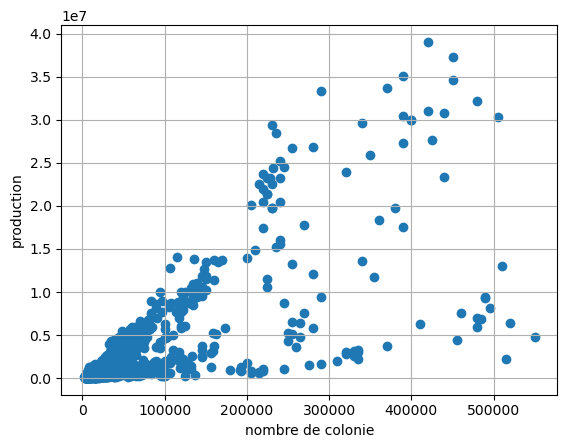

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr, linregress
import matplotlib.pyplot as plt
import seaborn as sns

miel = pd.read_csv("miel.csv")

df = miel.select_dtypes(include=[np.number, np.float64])

plt.scatter(df['colonies_number'], df['production'])
plt.xlabel("nombre de colonie")
plt.ylabel("production")
plt.grid(True)
plt.show()

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['colonies_number', 'production', 'stocks']]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          Variable       VIF
0  colonies_number  3.966187
1       production  3.889467
2           stocks  5.197572


In [38]:
stats = df.describe()
stats.loc['median'] = df.median()
print(stats)

        Unnamed: 0  colonies_number  yield_per_colony    production  \
count   1115.00000      1115.000000       1115.000000  1.115000e+03   
mean     557.00000     62438.565022         59.743498  2.851268e+06   
std      322.01708     92648.175955         19.940500  5.561202e+06   
min        0.00000      2000.000000         19.000000  1.200000e+04   
25%      278.50000      9000.000000         45.000000  2.460000e+05   
50%      557.00000     26000.000000         57.000000  8.280000e+05   
75%      835.50000     69000.000000         71.000000  2.700000e+06   
max     1114.00000    550000.000000        155.000000  3.906000e+07   
median   557.00000     26000.000000         57.000000  8.280000e+05   

              stocks  average_price  value_of_production         year  
count   1.115000e+03    1115.000000         1.115000e+03  1115.000000  
mean    1.172625e+06     140.623076         5.667412e+06  2007.740807  
std     2.049556e+06     107.011544         9.459460e+06     7.823002  
m

### la mediane est proche de la moyenne, les notes sont donc centrées autour de la moyenne

In [39]:
print(
    pd.DataFrame(
        pearsonr(
            df['colonies_number'], df['production']
        ),
        index=["pearson-coef", "p-value"],
        columns=["resultat_test"],
    )
)

              resultat_test
pearson-coef   7.366430e-01
p-value       2.774172e-191


### c/ soit H0 l'hypothèse nulle tel que H0:"Les deux variables sont dépendantes". Le risque est de 5%.
### p-value = 2.774172e-191, ce qui est plus grand que 5% , et le pearson-coef est de 7.366430e-01, ce qui signifie qu'il n'y a pas de corélation entre les deux variables. ainsi, on rejette l'hypotèse H0, les deux variables sont indépendantes

Slope :  44.21696060629329 
Intercept :  90424.59152508294


Text(0, 0.5, 'production de miel')

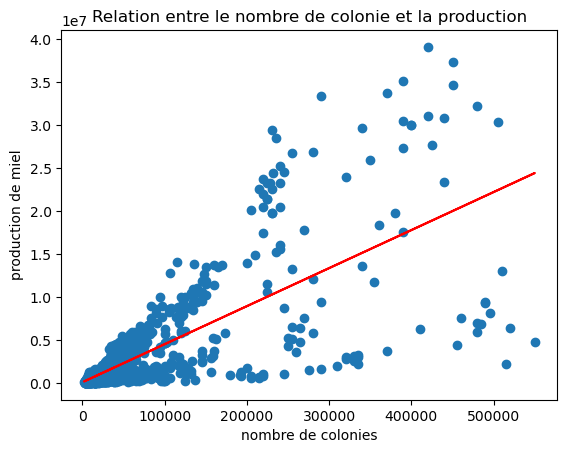

In [40]:
from scipy.stats import linregress
slope, intercept, r_valuen, p_value, std_err = linregress(
    df['colonies_number'], df['production']
)
print("Slope : ", slope, "\nIntercept : ", intercept)

plt.scatter(df['colonies_number'], df['production'])

def Prediction(x):
    return slope * x + intercept

fitline = Prediction(df['colonies_number'])

plt.plot(
    df['colonies_number'],
    fitline,
    color="red",    
    label="Modèle de régression",
)
plt.title("Relation entre le nombre de colonie et la production")
plt.xlabel("nombre de colonies")
plt.ylabel("production de miel")

## Nous allons maintenant enlever les outliers

      Unnamed: 0  colonies_number  yield_per_colony  production   stocks  \
537          537             6000                59      354000   138000   
443          443            16000                50      800000   328000   
272          272            13000                51      663000   530000   
27            27            12000                52      624000   162000   
580          580            12000                52      624000   137000   
...          ...              ...               ...         ...      ...   
423          423           116000                76     8816000  1411000   
971          971            97000                44      768000   768000   
1071        1071            98000                37      798000   798000   
724          724            92000                32      530000   530000   
803          803           100000                34      850000   850000   

      average_price  value_of_production  year  production Pred       EcartAB  
537    

Text(0, 0.5, 'production de miel')

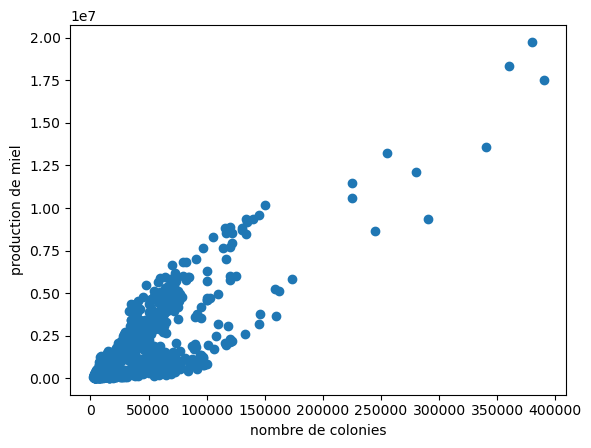

In [41]:
dfWithoutError = pd.DataFrame(df)
dfWithoutError["production Pred"] = Prediction(dfWithoutError['colonies_number'])

dfWithoutError['EcartAB'] = abs(dfWithoutError['production'] - dfWithoutError["production Pred"])

dfWithoutError = dfWithoutError.sort_values(by='EcartAB', ascending=True)
dfWithoutError = dfWithoutError.drop(dfWithoutError["EcartAB"].tail(150).index)
print(dfWithoutError)
plt.scatter(dfWithoutError['colonies_number'], dfWithoutError['production'])
plt.xlabel("nombre de colonies")
plt.ylabel("production de miel")

In [42]:
statsb = dfWithoutError.describe()
statsb.loc['median'] = dfWithoutError.median()
print(stats)

        Unnamed: 0  colonies_number  yield_per_colony    production  \
count   1115.00000      1115.000000       1115.000000  1.115000e+03   
mean     557.00000     62438.565022         59.743498  2.851268e+06   
std      322.01708     92648.175955         19.940500  5.561202e+06   
min        0.00000      2000.000000         19.000000  1.200000e+04   
25%      278.50000      9000.000000         45.000000  2.460000e+05   
50%      557.00000     26000.000000         57.000000  8.280000e+05   
75%      835.50000     69000.000000         71.000000  2.700000e+06   
max     1114.00000    550000.000000        155.000000  3.906000e+07   
median   557.00000     26000.000000         57.000000  8.280000e+05   

              stocks  average_price  value_of_production         year  
count   1.115000e+03    1115.000000         1.115000e+03  1115.000000  
mean    1.172625e+06     140.623076         5.667412e+06  2007.740807  
std     2.049556e+06     107.011544         9.459460e+06     7.823002  
m

In [43]:
print(
    pd.DataFrame(
        pearsonr(
            dfWithoutError['colonies_number'], dfWithoutError['production']
        ),
        index=["pearson-coef", "p-value"],
        columns=["resultat_test"],
    )
)

              resultat_test
pearson-coef   8.385551e-01
p-value       3.129589e-256


Slope :  44.22170680619919 
Intercept :  -37175.106374791125


Text(0, 0.5, 'production de miel')

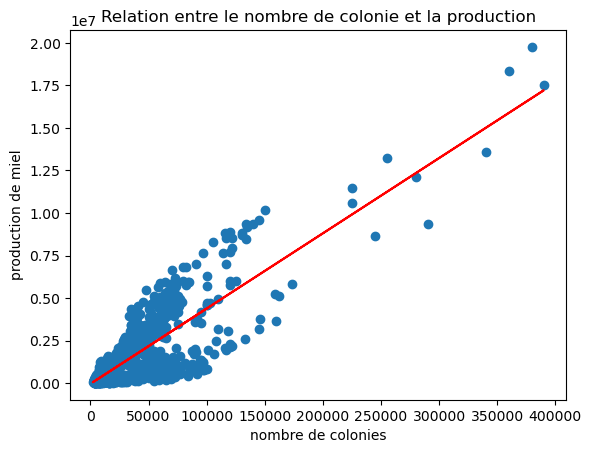

In [44]:
from scipy.stats import linregress
slope, intercept, r_valuen, p_value, std_err = linregress(
    dfWithoutError['colonies_number'], dfWithoutError['production']
)
print("Slope : ", slope, "\nIntercept : ", intercept)

plt.scatter(dfWithoutError['colonies_number'], dfWithoutError['production'])

def Prediction(x):
    return slope * x + intercept

fitline = Prediction(dfWithoutError['colonies_number'])

plt.plot(
    dfWithoutError['colonies_number'],
    fitline,
    color="red",    
    label="Modèle de régression",
)
plt.title("Relation entre le nombre de colonie et la production")
plt.xlabel("nombre de colonies")
plt.ylabel("production de miel")

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(dfWithoutError['colonies_number'], fitline)
mse = mean_squared_error(dfWithoutError['colonies_number'], fitline)
rmse = np.sqrt(mse)
print(f"MAE : {mae}")
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")

MAE : 1451711.9170984456
MSE : 5329711190100.431
RMSE : 2308616.726548699


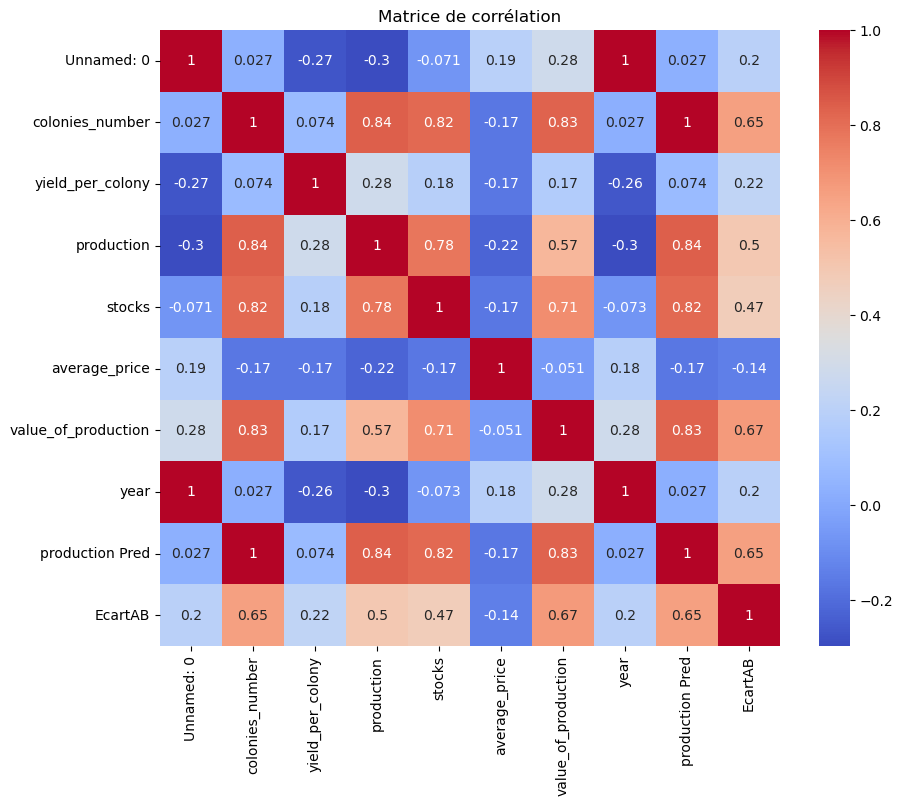

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(dfWithoutError.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

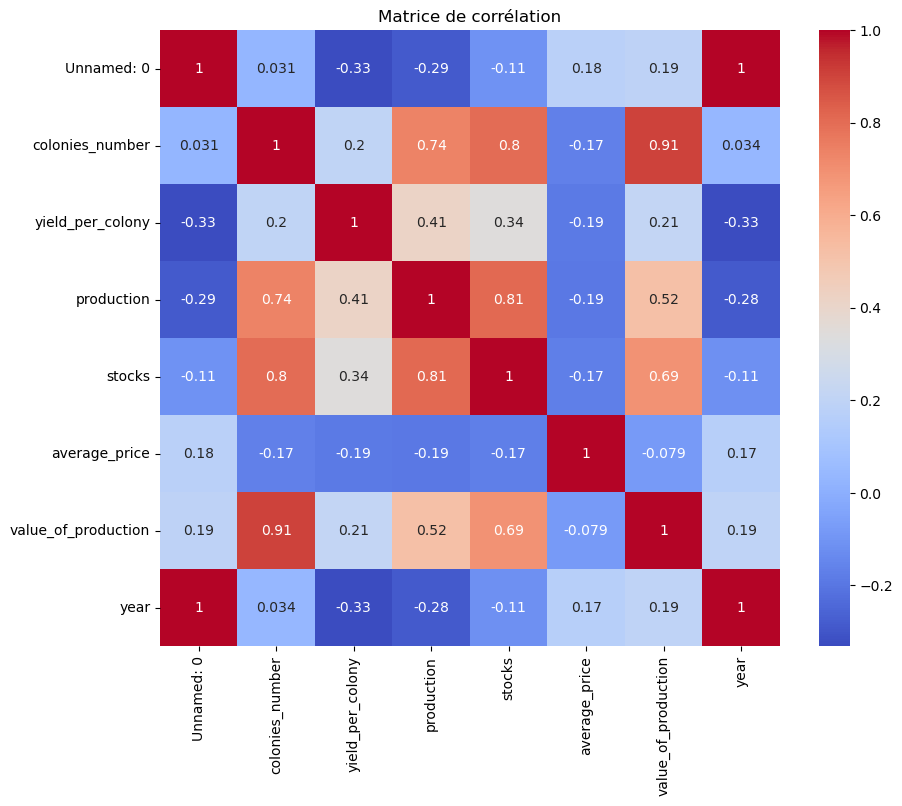

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

In [48]:
new_data = np.random.randint(10000, 20000, 10)
print(new_data)
new_predictions = Prediction(new_data)
print("\nPrédictions pour de salaires en fonction du temps d'experience :")
for i, pred in enumerate(new_predictions):
    print(f"{new_data[i]} -> Prédiction : {pred}")

[11001 13511 12711 17804 19542 10670 14561 11356 13015 16505]

Prédictions pour de salaires en fonction du temps d'experience :
11001 -> Prédiction : 449307.89020020614
13511 -> Prédiction : 560304.3742837661
12711 -> Prédiction : 524927.0088388068
17804 -> Prédiction : 750148.1616027792
19542 -> Prédiction : 827005.4880319533
10670 -> Prédiction : 434670.5052473542
14561 -> Prédiction : 606737.1664302752
11356 -> Prédiction : 465006.59611640684
13015 -> Prédiction : 538370.4077078913
16505 -> Prédiction : 692704.1644615264
